In [ ]:
# MLFA Assignment 2

# Team Members - 
# Deepansh Agrawal - 19MI10018
# Rohit Ranjan - 20CS30066
# Neha Gupta - 20CH10094
# Gautam Jaju - 20AG30015
# Siddharth Madhupati - 20ME30083
# Madiha Hanifa - 20MF10018
# Himadri Pandya - 20ME10047

In [1]:
# import commands
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
# installing wget on Colab then downloading dataset
!pip install wget
import wget
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00537/sobar-72.csv'
filename = wget.download(url)

In [3]:
# setting a seed for repeatability
np.random.seed(42)

In [4]:
# adding a bias column to imported dataframe so that b can be simulated with a theta parameter later
df = pd.read_csv("sobar-72.csv")
df.insert(0, "bias", np.ones((72)), False)

In [5]:
df.shape

(72, 21)

In [6]:
df.head()

,bias,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,...,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,ca_cervix
0,1.0,10,13,12,4,7,9,10,1,8,...,3,14,8,5,7,12,12,11,8,1
1,1.0,10,11,11,10,14,7,7,5,5,...,2,15,13,7,6,5,5,4,4,1
2,1.0,10,15,3,2,14,8,10,1,4,...,2,7,3,3,6,11,3,3,15,1
3,1.0,10,11,10,10,15,7,7,1,5,...,2,15,13,7,4,4,4,4,4,1
4,1.0,8,11,7,8,10,7,8,1,5,...,2,15,5,3,6,12,5,4,7,1


In [7]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [8]:
# splitting train and test sets using specified instructions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [9]:
# specified hyperparameters used
learning_rate = 0.001
iterations = 1000
loss_array =[]

In [10]:
# random initialisation of the parameters of the model
params = np.random.rand(20,1)

In [11]:
# the learning loop is run for specified number of interations
for iter in range(iterations):
    avg_loss = 0
    
    # each data row is seen during each epoch
    for curr_index in range(X_train.shape[0]):
        
        # extracting a row from train set
        test_row = X_train.iloc[curr_index]
        test_row = np.array(test_row)
        test_row = np.reshape(test_row,(-1,1))
        
        # label is the ground truth
        label = y_train.iloc[curr_index]
        
        # calculating Z, the linear function of features
        Z = np.matmul(np.transpose(params),test_row)
        Z = Z[0,0]
        
        # logistic function applied
        LR = np.exp(Z)/(1+np.exp(Z))
        
        # calculating the loss
        loss = label*np.log(LR) + (1-label)*np.log(1-LR)
        avg_loss = avg_loss+loss
        
        # updating param values
        for i in range(20):
            params[i] = params[i] + learning_rate*((label - LR)*test_row[i])
            
    avg_loss = avg_loss/X_train.shape[0]
    # appending avg loss per epoch at to an array
    loss_array.append(np.abs(avg_loss))

/home/tfjuror/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log
/home/tfjuror/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in multiply


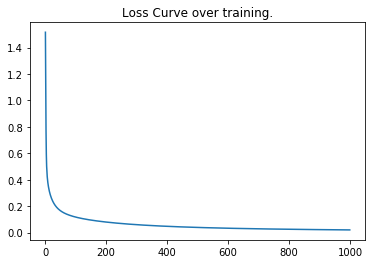

In [12]:
# decreasing loss is seen
plt.plot(loss_array)
plt.title("Loss Curve over training.")
plt.show()

In [13]:
# utility function that prints the accuracy on a dataset (X,y) 
# params is the array with trained parameter values
def accuracy_ours(X,y,params):
    correct=0
    for i in range(X.shape[0]):
        test_row = X.iloc[i]
        test_row = np.array(test_row)
        test_row = np.reshape(test_row,(-1,1)) 
        Z = np.matmul(np.transpose(params),test_row)
        Z = Z[0,0]
        
        LR = np.exp(Z)/(1+np.exp(Z))
        pred=0
        if(LR>0.5):
            pred = 1
            
        if(pred == y.iloc[i]):
            correct= correct+1
     
    print(correct/X.shape[0])

In [14]:
# final accuracy on the train set
accuracy_ours(X_train,y_train,params)

1.0


In [15]:
# accuracy(OURS) on the test dataset
accuracy_ours(X_test,y_test,params)

1.0


In [16]:
# Now we train the LogisticRegression object from SKLEARN on the same train dataset with same hyperparameters
clf = LogisticRegression(random_state=42,max_iter=1000,).fit(X_train, y_train)

# predictions are generated on the test dataset
pred = clf.predict(X_test)

In [17]:
# utility function that prints accuracy on a dataset(X,y)
# clf is the trained classifier model that needs to be passed
def accuracy_sklearn(X,y,clf):
    correct=0
    
    # predictions are generated on the test dataset
    pred = clf.predict(X)
    
    for i in range(X.shape[0]):
        if(pred[i] == y.iloc[i]):
            correct= correct+1
    print(correct/X.shape[0])

In [18]:
# accuracy of the SKLEARN model trained on same train set on the same test set
accuracy_sklearn(X_test,y_test,clf)

1.0
